In [0]:
from sklearn.datasets import load_boston
boston=load_boston()

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
boston.data.shape

(506, 13)

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [0]:
#Converting it into pandas Dataframe
import pandas as pd
df=pd.DataFrame(boston.data)
df.columns=boston.feature_names

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df['Price']=boston.target

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [0]:
y=df['Price']
X=df.drop('Price',axis=1)

In [0]:
df_dmatrix=xgb.DMatrix(data=X,label=y)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
xgreg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)

In [0]:
xgreg.fit(X_train,y_train)
y_pred=xgreg.predict(X_test)

In [0]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [18]:
rmse

9.283201404955093

In [0]:
#Cross Validation
params={"objective":"reg:linear","colsamples_bytree":0.3,"learning_rate":0.1,"max_depth":5,"alpha":10}

In [0]:
cv_results=xgb.cv(dtrain=df_dmatrix,params=params,nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics='rmse',as_pandas=True,seed=45)

In [21]:
cv_results.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,21.650680,0.282408,21.636072,0.132888
1,19.660630,0.257383,19.622967,0.123679
2,17.852572,0.243391,17.812838,0.109360
3,16.255555,0.213177,16.179445,0.098358
4,14.839019,0.218994,14.717030,0.090705


In [22]:
cv_results['test-rmse-mean'].tail(1)

49    3.606789
Name: test-rmse-mean, dtype: float64

In [0]:
xgreg=xgb.train(params=params,dtrain=df_dmatrix,num_boost_round=10)

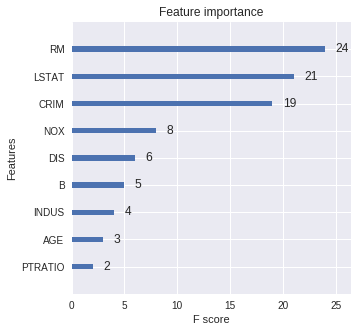

In [31]:
xgb.plot_importance(xgreg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()